In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df1 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2013-13.csv", encoding='latin1')
df2 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2014.csv", encoding='latin1')
df3 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2015.csv", encoding='latin1')
df4 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2016.csv", encoding='latin1')
df5 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2017.csv", encoding='latin1')
df6 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2018.csv", encoding='latin1')
df7 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2019.csv", encoding='latin1')
df8 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2020.csv", encoding='latin1')
df9 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2021.csv", encoding='latin1')
df10 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2022.csv", encoding='latin1')
df11 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2023,1.csv", encoding='latin1')
df12 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2023,2.csv", encoding='latin1')
df13 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2024,1.csv", encoding='latin1')
df14 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2024,2.csv", encoding='latin1')

C:\Users\VIP\AppData\Local\Temp\ipykernel_6476\2137474169.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2013-13.csv", encoding='latin1')
C:\Users\VIP\AppData\Local\Temp\ipykernel_6476\2137474169.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2014.csv", encoding='latin1')
C:\Users\VIP\AppData\Local\Temp\ipykernel_6476\2137474169.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2015.csv", encoding='latin1')
C:\Users\VIP\AppData\Local\Temp\ipykernel_6476\2137474169.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(r"D:\temp\Car_Ins

In [4]:
import pandas as pd

# List of all dataframes
all_dfs = [
    df1, df2, df3, df4, df5, df6, df7,
    df8, df9, df10, df11, df12, df13, df14
]

# Concatenate into a single dataframe
df = pd.concat(all_dfs, axis=0, ignore_index=True)


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.isnull().sum()

pvsnr                         0
vsnr                          0
status                        0
aktiv                         0
akt_kuka                      0
spartek                       0
beginn                        0
datum_s                 2138699
vtr_dau                      78
kund_beg                     10
vtrweg                        0
gesbeitr                     84
SDANZAHL                     69
SCHAGESA                     69
KOSTGESA                     69
KOSTGEKA                     69
kosten_verw                  69
kosten_prov                  69
gfeld                         0
ort                           0
plz                          19
alter                         0
anr                           0
SDBEITR5                     69
HERSTELLER                   62
HSN                       42894
TSN                      189580
ELEKTRO                      35
KILOMETERSTAND_CLEAN    1023998
ZW                            0
WKZ                     2098370
KH_SF   

In [8]:
columns_to_drop = [
    'WKZ', 'KH_SF', 'ERSZ_aktiv','datum_s',
    'ZW_storn', 'WKZ_storn', 'KH_SF_storn', 'ERSZ_storn','pvsnr'
]

df = df.drop(columns=columns_to_drop)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201331 entries, 0 to 4201330
Data columns (total 30 columns):
 #   Column                Dtype  
---  ------                -----  
 0   vsnr                  object 
 1   status                object 
 2   aktiv                 int64  
 3   akt_kuka              int64  
 4   spartek               object 
 5   beginn                object 
 6   vtr_dau               float64
 7   kund_beg              object 
 8   vtrweg                object 
 9   gesbeitr              float64
 10  SDANZAHL              float64
 11  SCHAGESA              float64
 12  KOSTGESA              float64
 13  KOSTGEKA              float64
 14  kosten_verw           float64
 15  kosten_prov           float64
 16  gfeld                 object 
 17  ort                   object 
 18  plz                   object 
 19  alter                 int64  
 20  anr                   object 
 21  SDBEITR5              float64
 22  HERSTELLER            object 
 23  HSN    

In [10]:
#Factorizing the data from catagorical to numerical
df['beginn'] = pd.to_datetime(df['beginn'], format='%d.%m.%Y')
df['beg_year'] = df['beginn'].dt.year
df['beg_month'] = df['beginn'].dt.month
df['beg_day'] = df['beginn'].dt.day
# Extracting Weekday from date
df['weekday'] = df['beginn'].dt.day_name()
df['Quarter'] = pd.to_datetime(df['beg_month'], format='%m').dt.quarter

In [11]:
#Factorizing the data from catagorical to numerical
df['Weekday_id'] = pd.factorize(df['weekday'])[0]+1
df.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)

C:\Users\VIP\AppData\Local\Temp\ipykernel_6476\2291113106.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)


In [12]:
#Factorizing the data from catagorical to numerical
df['Cus_type'] = df['gfeld'].str.split('/').str[0]
df['Cus_typ_id'] = pd.factorize(df['Cus_type'])[0]+1
df['ort_id'] = pd.factorize(df['ort'])[0]+1
df[['Sex_id','Sex']]= df['anr'].str.split('/',expand=True)
df['gender_id'] = pd.factorize(df['Sex_id'])[0]+1
df['plz_id'] = pd.factorize(df['plz'])[0]+1
df['Hersteller_id'] = pd.factorize(df['HERSTELLER'])[0]+1
df['spartek'] = pd.factorize(df['spartek'])[0]+1

In [13]:
labels, uniques = pd.factorize(df['plz'])
df['plz_id'] = labels + 1  # If you want to start from 1

# Display the mapping
mapping = {category: code + 1 for code, category in enumerate(uniques)}
print(mapping)


{'24944': 1, '24994': 2, '24885': 3, '24850': 4, '24943': 5, '24890': 6, '23845': 7, '24937': 8, '24405': 9, '24401': 10, '24392': 11, '24107': 12, '23823': 13, '24395': 14, '24860': 15, '24589': 16, '24837': 17, '23701': 18, '24891': 19, '24988': 20, '24991': 21, '24969': 22, '24149': 23, '24975': 24, '24796': 25, '22303': 26, '24894': 27, '24977': 28, '24989': 29, '24972': 30, '24357': 31, '24976': 32, '24966': 33, '24986': 34, '24873': 35, '24376': 36, '24816': 37, '24367': 38, '16727': 39, '24882': 40, '24864': 41, '24881': 42, '24879': 43, '24220': 44, '24960': 45, '24790': 46, '24939': 47, '24407': 48, '24402': 49, '24817': 50, '24855': 51, '23827': 52, '24955': 53, '24980': 54, '24941': 55, '24997': 56, '25578': 57, '14469': 58, '24635': 59, '24983': 60, '24996': 61, '24888': 62, '24409': 63, '24404': 64, '24893': 65, '24808': 66, '24897': 67, '24366': 68, '24360': 69, '24340': 70, '25856': 71, '24214': 72, '24794': 73, '24857': 74, '24361': 75, '24814': 76, '24363': 77, '24358'

In [14]:
# Mapping postal codes to states in Germany
# The mapping is based on the first two digits of the postal code (PLZ)
plz_state_mapping = {
    '01': 'Sachsen',
    '02': 'Sachsen',
    '03': 'Brandenburg',
    '04': 'Sachsen',
    '05': 'Sachsen-Anhalt',
    '06': 'Sachsen-Anhalt',
    '07': 'Thüringen',
    '08': 'Sachsen',
    '09': 'Sachsen',

    '10': 'Berlin', '11': 'Berlin', '12': 'Brandenburg',
    '13': 'Brandenburg', '14': 'Brandenburg', '15': 'Brandenburg',
    '16': 'Brandenburg',

    '17': 'Mecklenburg-Vorpommern', '18': 'Mecklenburg-Vorpommern',
    '19': 'Mecklenburg-Vorpommern',

    '20': 'Schleswig-Holstein', '21': 'Schleswig-Holstein',
    '22': 'Hamburg', '23': 'Schleswig-Holstein',

    '24': 'Schleswig-Holstein', '25': 'Schleswig-Holstein',
    '26': 'Niedersachsen', '27': 'Bremen', '28': 'Bremen',
    '29': 'Niedersachsen',

    '30': 'Niedersachsen', '31': 'Niedersachsen', '32': 'Nordrhein-Westfalen',
    '33': 'Nordrhein-Westfalen', '34': 'Hessen',

    '35': 'Hessen', '36': 'Hessen', '37': 'Niedersachsen',
    '38': 'Niedersachsen', '39': 'Sachsen-Anhalt',

    '40': 'Nordrhein-Westfalen', '41': 'Nordrhein-Westfalen',
    '42': 'Nordrhein-Westfalen', '44': 'Nordrhein-Westfalen',
    '45': 'Nordrhein-Westfalen', '46': 'Nordrhein-Westfalen',

    '47': 'Nordrhein-Westfalen', '48': 'Nordrhein-Westfalen',
    '49': 'Niedersachsen',

    '50': 'Nordrhein-Westfalen', '51': 'Nordrhein-Westfalen',
    '52': 'Nordrhein-Westfalen', '53': 'Nordrhein-Westfalen',
    '54': 'Rheinland-Pfalz', '55': 'Rheinland-Pfalz',

    '56': 'Rheinland-Pfalz', '57': 'Nordrhein-Westfalen',
    '58': 'Nordrhein-Westfalen', '59': 'Nordrhein-Westfalen',

    '60': 'Hessen', '61': 'Hessen', '62': 'Hessen',
    '63': 'Hessen', '64': 'Hessen', '65': 'Hessen',

    '66': 'Saarland', '67': 'Rheinland-Pfalz', '68': 'Rheinland-Pfalz',
    '69': 'Hessen',

    '70': 'Baden-Württemberg', '71': 'Baden-Württemberg',
    '72': 'Baden-Württemberg', '73': 'Baden-Württemberg',
    '74': 'Baden-Württemberg', '75': 'Baden-Württemberg',
    '76': 'Baden-Württemberg', '77': 'Baden-Württemberg',
    '78': 'Baden-Württemberg', '79': 'Baden-Württemberg',

    '80': 'Bayern', '81': 'Bayern', '82': 'Bayern', '83': 'Bayern',
    '84': 'Bayern', '85': 'Bayern', '86': 'Bayern', '87': 'Bayern',
    '88': 'Bayern', '89': 'Bayern',

    '90': 'Bayern', '91': 'Bayern', '92': 'Bayern', '93': 'Bayern',
    '94': 'Bayern', '95': 'Bayern', '96': 'Bayern',

    '97': 'Bayern', '98': 'Thüringen', '99': 'Thüringen'
}

def get_state_from_plz(plz):
    if pd.isnull(plz):
        return None
    try:
        plz_str = str(plz).zfill(5)  # ensure it's 5 digits
        return plz_state_mapping.get(plz_str[:2])
    except:
        return None
    
df['state'] = df['plz'].apply(get_state_from_plz)
df['state_id'] = pd.factorize(df['state'])[0]+1
df = df.dropna(subset=['state'])


In [15]:
#Factorizing the data from catagorical to numerical
df['status_id'] = pd.factorize(df['status'])[0]+1
df['ELEKTRO'] = pd.factorize(df['ELEKTRO'])[0]+1

In [16]:
#Using this technique as factorize make nan values to 0, nan values should be in nan 
codes, uniques = pd.factorize(df['TSN'], sort=True)
df['TSN'] = np.where(df['TSN'].isna(), np.nan, codes + 1)
df['alter'] = df['alter'].replace([998, 999], np.nan)


In [17]:
#Converting the date column to datetime format
df['First_reg'] = pd.to_datetime(df['ersz_final'], format="%d%b%Y")
df['Car_age_indays'] = (pd.Timestamp.today() - df['First_reg']).dt.days
df['carage_years'] = df['Car_age_indays'] / 365.25
df['carage_years'] = df['carage_years'].round(0)
df = df[df['carage_years'] >= 0]


In [18]:
df.head()

,vsnr,status,aktiv,akt_kuka,spartek,beginn,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,ZW,claim,ersz_final,beg_year,beg_month,beg_day,weekday,Quarter,Weekday_id,Cus_type,Cus_typ_id,ort_id,Sex_id,Sex,gender_id,plz_id,Hersteller_id,state,state_id,status_id,First_reg,Car_age_indays,carage_years
0,01012223-003,Aktiv,1,1,1,2013-06-16,4306.0,17.09.1969,1,110.00,0.0,0.0,0.0,0.0,70.54,41.38,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,404.26,VOLKSWAGEN-VW,603.0,1367.0,1,104982.0,65697/ jährlich,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5896.0,16.0
1,01012223-003,Aktiv,1,1,2,2013-06-16,4306.0,17.09.1969,1,253.96,0.0,0.0,0.0,0.0,186.81,89.36,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,1076.16,VOLKSWAGEN-VW,603.0,1367.0,1,104982.0,65697/ jährlich,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5896.0,16.0
2,01012748-002,Storno,0,0,1,2013-10-08,3805.0,03.05.1979,1,325.06,0.0,0.0,0.0,0.0,134.57,77.70,70269/ Land- und Forstwirtschaft,Böxlund,24994,NaN,01515/ Erbengemeinschaft,752.15,NISSAN (J),1329.0,1266.0,1,50000.0,*No Format*,0,20JUN2018,2013,10,8,Tuesday,4,2,70269,2,2,01515,Erbengemeinschaft,2,2,2,Schleswig-Holstein,1,2,2018-06-20,2605.0,7.0
3,01012748-002,Storno,0,0,2,2013-10-08,3805.0,03.05.1979,1,186.02,0.0,0.0,0.0,0.0,121.83,58.12,70269/ Land- und Forstwirtschaft,Böxlund,24994,NaN,01515/ Erbengemeinschaft,703.32,NISSAN (J),1329.0,1266.0,1,50000.0,*No Format*,0,20JUN2018,2013,10,8,Tuesday,4,2,70269,2,2,01515,Erbengemeinschaft,2,2,2,Schleswig-Holstein,1,2,2018-06-20,2605.0,7.0
4,01012748-002,Storno,0,0,3,2013-10-08,2927.0,03.05.1979,1,0.00,0.0,0.0,0.0,0.0,19.41,8.72,70269/ Land- und Forstwirtschaft,Böxlund,24994,NaN,01515/ Erbengemeinschaft,104.68,NISSAN (J),1329.0,1266.0,1,50000.0,*No Format*,0,20JUN2018,2013,10,8,Tuesday,4,2,70269,2,2,01515,Erbengemeinschaft,2,2,2,Schleswig-Holstein,1,2,2018-06-20,2605.0,7.0


In [18]:
#vtr_dau gesbeitr KOSTGESA KOSTGEKA kosten_verw kosten_prov  spartek status_id Car_age_indays estimated_total_paid

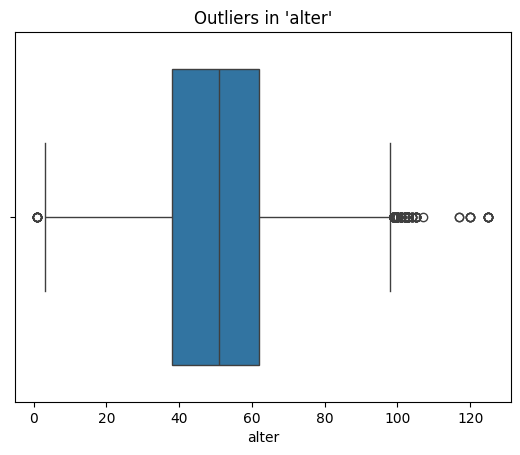

In [19]:
# Creating a boxplot to visualize outliers in the 'alter' column
sns.boxplot(x=df['alter'])
plt.title("Outliers in 'alter'")
plt.show()


In [20]:
df.alter.unique()

array([ 83.,  nan,  74.,  82.,  67.,  62.,  60.,  58.,  96.,  75.,  70.,
        68.,  66.,  73.,  61.,  64.,  59.,  72.,  77.,  63.,  80.,  71.,
        76.,  88.,  65.,  81.,  86.,  84.,  69.,  79.,  89.,  94.,  87.,
        78.,  85.,  92.,  91.,  93.,  90.,  57.,  56.,  49.,  55.,  53.,
        54.,  52.,  51.,  97.,  50.,  44.,  48.,  95.,  98.,  42.,  47.,
        43.,  46.,  33.,  41.,  37.,  40.,  45.,  30.,  32.,  35.,  39.,
        38.,  34.,  36.,  29.,  31.,  26.,  28.,  99., 102.,  27., 100.,
       101.,  12., 104., 107., 103.,  25., 105.,  22.,  24.,  14.,  20.,
       125.,   8.,  23.,   6.,   4.,  21.,   5.,  19.,  18.,  17., 120.,
         1.,  11.,   3.,   9., 117.,  16.,  13.,  15.])

In [21]:
#Handeling missing alter values 
#First, we will check how many missing values are in the 'alter' column and then fill them with random ages between 18 and 85.
missing_count = df['alter'].isnull().sum()
min_age = 18
max_age = 85
random_ages = np.random.randint(min_age, max_age + 1, size=missing_count)
df.loc[df['alter'].isnull(), 'alter'] = random_ages

In [22]:
df = df.dropna(subset=['TSN']).copy()
df['TSN_id']= pd.factorize(df['TSN'])[0]+1  
# To estimate the actual amount customer paid during his entire duration of service 
df['estimated_total_paid'] = (df['SDBEITR5'] / (5 * 365)) * df['vtr_dau']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3945865 entries, 0 to 4201330
Data columns (total 52 columns):
 #   Column                Dtype         
---  ------                -----         
 0   vsnr                  object        
 1   status                object        
 2   aktiv                 int64         
 3   akt_kuka              int64         
 4   spartek               int64         
 5   beginn                datetime64[ns]
 6   vtr_dau               float64       
 7   kund_beg              object        
 8   vtrweg                int64         
 9   gesbeitr              float64       
 10  SDANZAHL              float64       
 11  SCHAGESA              float64       
 12  KOSTGESA              float64       
 13  KOSTGEKA              float64       
 14  kosten_verw           float64       
 15  kosten_prov           float64       
 16  gfeld                 object        
 17  ort                   object        
 18  plz                   object        
 19  alter

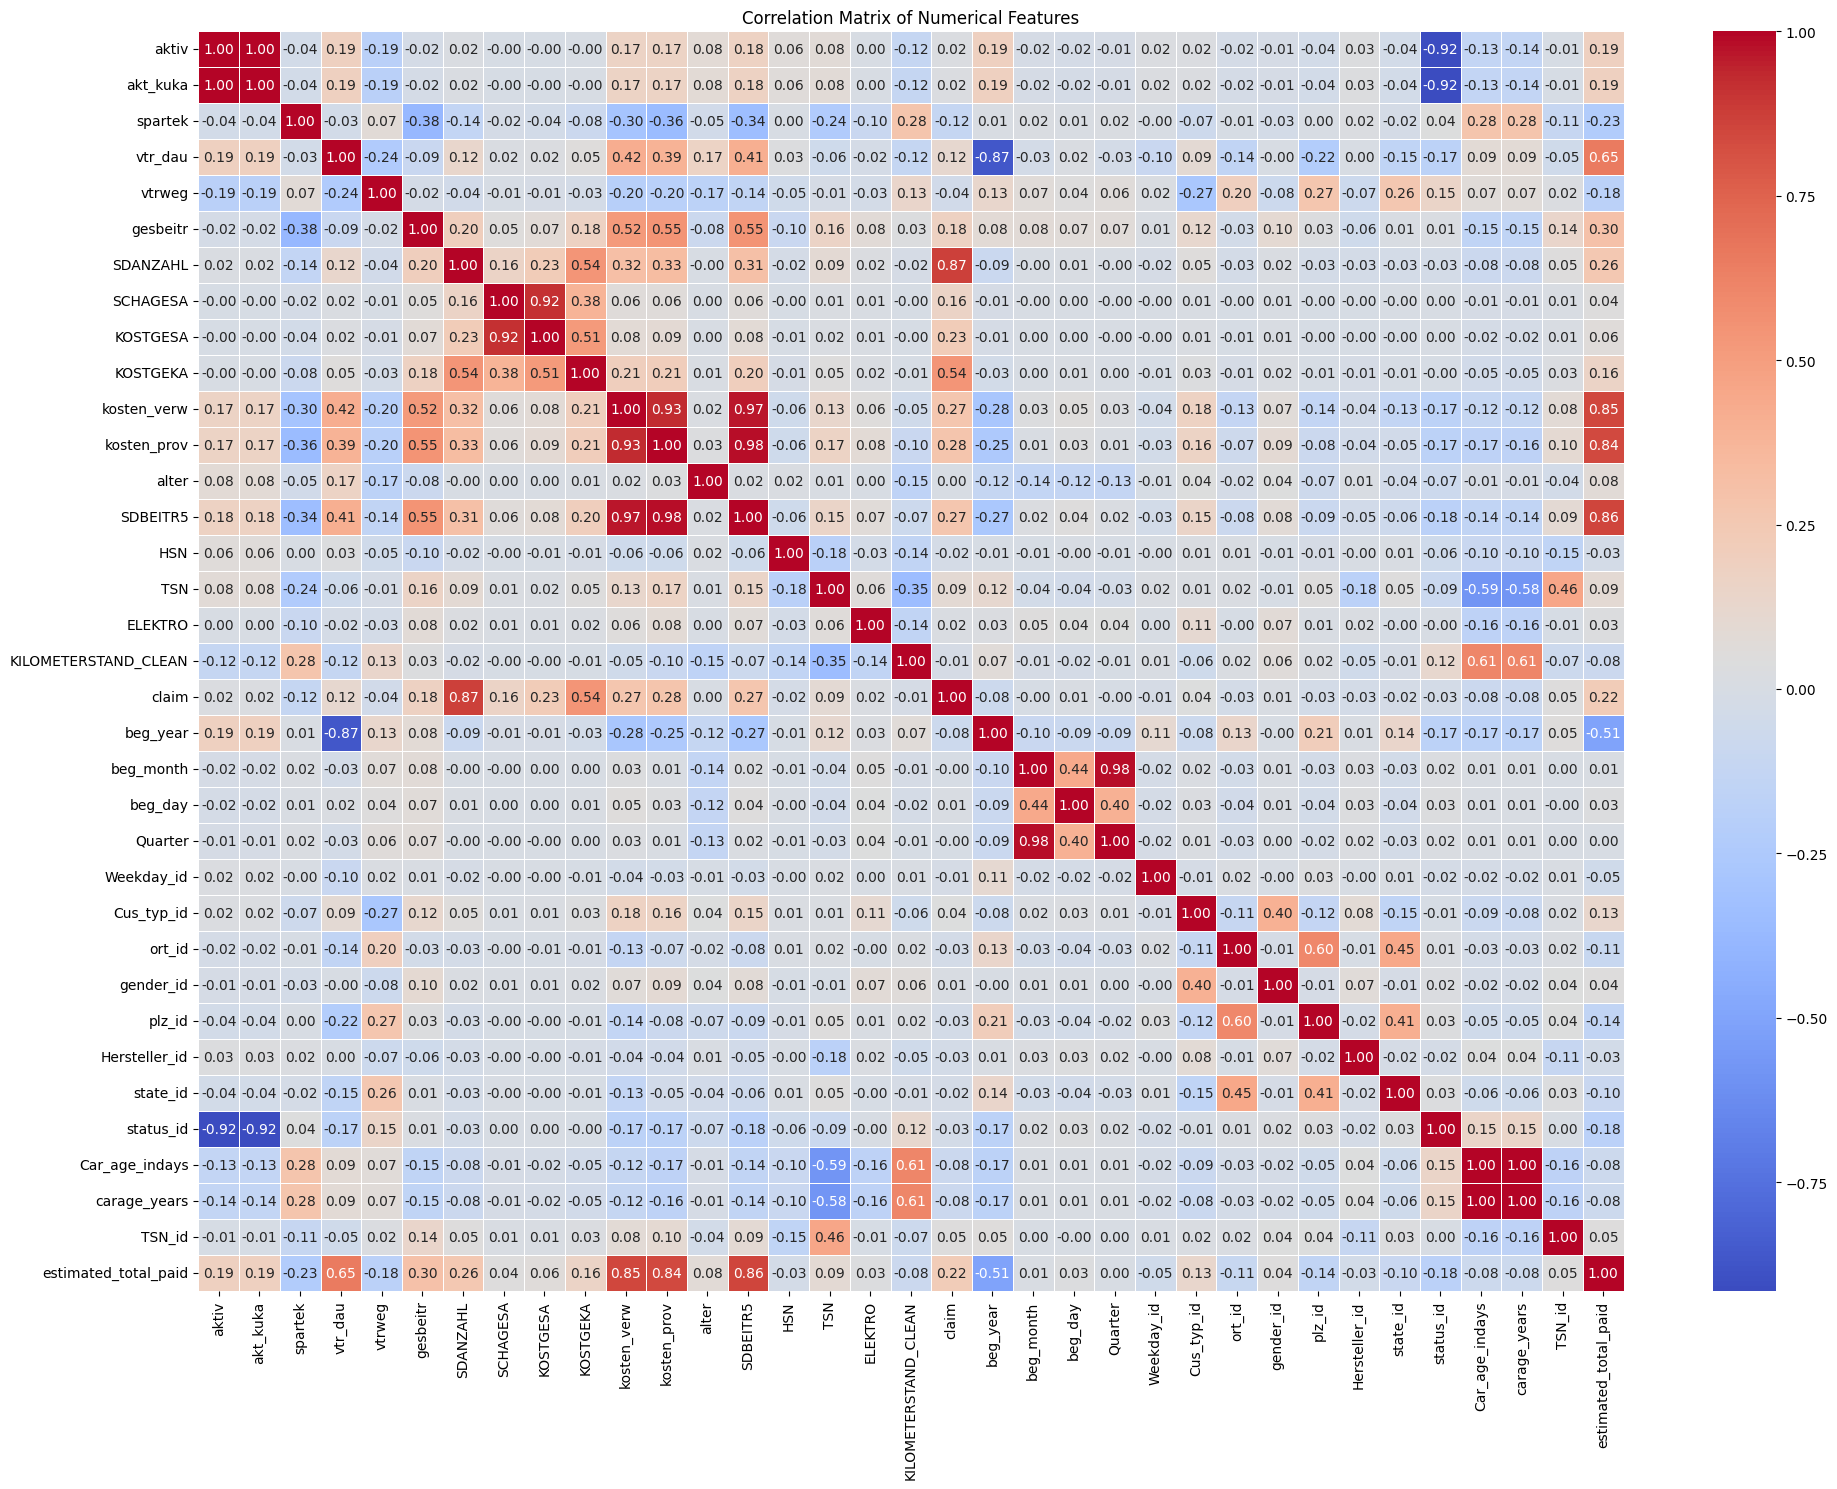

In [25]:
# Visualizing the correlation matrix of numerical features in the dataset
# This will help in understanding the relationships between different numerical features.
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3. Display as heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [26]:
# Assuming 'SDANZAHL' is your target variable for claims prediction
X = df.select_dtypes(include=['number']).drop(['claim'], axis=1)
y = df['claim']

# Print shapes to verify
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (3945865, 34)
Target shape: (3945865,)


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Starting Deep Learning Pipeline for Claim Prediction WITH CLASS WEIGHTS
Dataset Shape: (3945865, 52)

Dataset Columns: ['vsnr', 'status', 'aktiv', 'akt_kuka', 'spartek', 'beginn', 'vtr_dau', 'kund_beg', 'vtrweg', 'gesbeitr', 'SDANZAHL', 'SCHAGESA', 'KOSTGESA', 'KOSTGEKA', 'kosten_verw', 'kosten_prov', 'gfeld', 'ort', 'plz', 'alter', 'anr', 'SDBEITR5', 'HERSTELLER', 'HSN', 'TSN', 'ELEKTRO', 'KILOMETERSTAND_CLEAN', 'ZW', 'claim', 'ersz_final', 'beg_year', 'beg_month', 'beg_day', 'weekday', 'Quarter', 'Weekday_id', 'Cus_type', 'Cus_typ_id', 'ort_id', 'Sex_id', 'Sex', 'gender_id', 'plz_id', 'Hersteller_id', 'state', 'state_id', 'status_id', 'First_reg', 'Car_age_indays', 'carage_years', 'TSN_id', 'estimated_total_paid']

Target Variable 'claim' Distribution:
claim
0    3513238
1     432627
Name: count, dtype: int64

Target Balance: claim
0    0.890359
1    0.109641
Name: proportion, dtype: float64

Class Imbalance Ratio: 8.12:1

FEATURE ANALYSIS

Feature Statistics:
            vtr_dau    

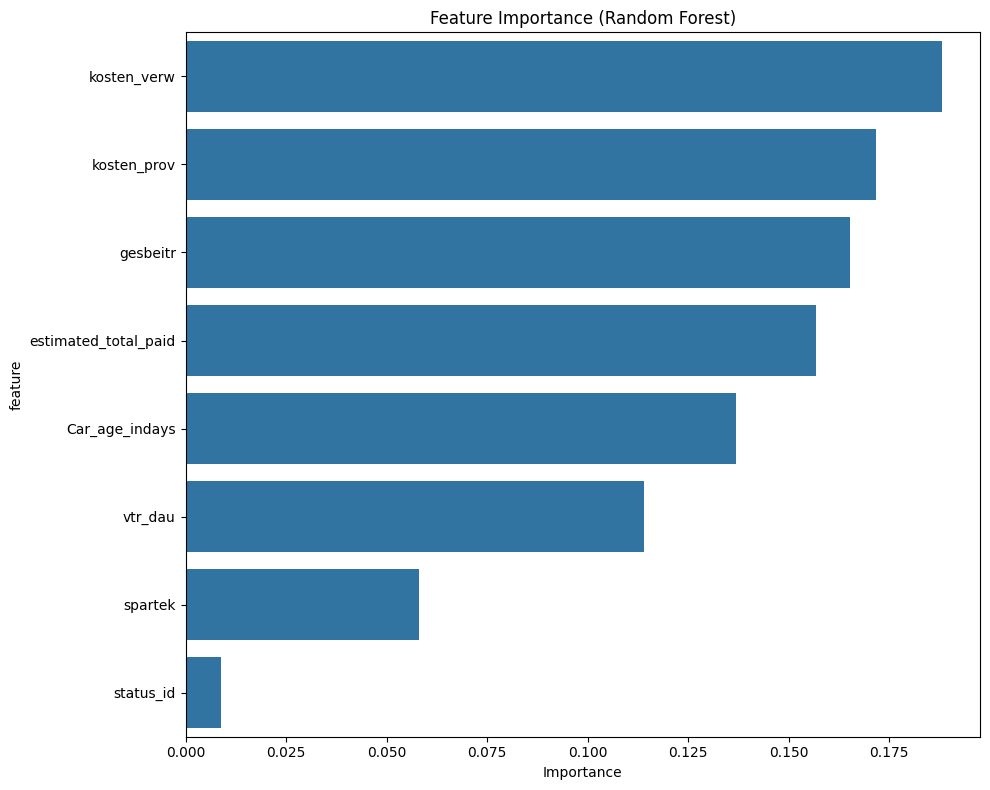


Model Architecture:
  Input features: 8


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 11,969 (46.75 KB)

 Non-trainable params: 448 (1.75 KB)


🎯 TRAINING WITH CLASS WEIGHTS:
   Class 0: weight = 0.5616
   Class 1: weight = 4.5604
Training Deep Learning Model with Class Weights...
Epoch 1/100
98647/98647 ━━━━━━━━━━━━━━━━━━━━ 219s 2ms/step - accuracy: 0.6908 - loss: 0.5711 - precision: 0.2217 - recall: 0.7252 - val_accuracy: 0.7140 - val_loss: 0.5410 - val_precision: 0.2368 - val_recall: 0.7239 - learning_rate: 0.0010
Epoch 2/100
98647/98647 ━━━━━━━━━━━━━━━━━━━━ 234s 2ms/step - accuracy: 0.6972 - loss: 0.5635 - precision: 0.2265 - recall: 0.7293 - val_accuracy: 0.7147 - val_loss: 0.5309 - val_precision: 0.2371 - val_recall: 0.7228 - learning_rate: 0.0010
Epoch 3/100
98647/98647 ━━━━━━━━━━━━━━━━━━━━ 227s 2ms/step - accuracy: 0.6998 - loss: 0.5618 - precision: 0.2279 - recall: 0.7282 - val_accuracy: 0.7202 - val_loss: 0.5322 - val_precision: 0.2402 - val_recall: 0.7175 - learning_rate: 0.0010
Epoch 4/100
98647/98647 ━━━━━━━━━━━━━━━━━━━━ 225s 2ms/step - accuracy: 0.6999 - loss: 0.5608 - precision: 0.2279 - recall: 0.7274 - val_ac

KeyboardInterrupt: 

In [30]:
# Deep Learning Solution for Claim Prediction - Manual Feature Selection WITH CLASS WEIGHTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class ClaimPredictionModel:
    def __init__(self, manual_features=None, target_column='claim'):
        self.scaler = StandardScaler()
        self.model = None
        self.feature_names = manual_features
        self.target_name = target_column
        self.class_weights = None  # NEW: Store class weights
        
    def load_and_explore_data(self, df):
        """Load and explore the dataset"""
        print("Dataset Shape:", df.shape)
        print(f"\nDataset Columns: {list(df.columns)}")
        
        # Check if target column exists
        if self.target_name not in df.columns:
            print(f"\nERROR: Target column '{self.target_name}' not found in dataset!")
            print("Available columns:", list(df.columns))
            raise KeyError(f"Target column '{self.target_name}' not found. Please specify the correct target column name.")
        
        print(f"\nTarget Variable '{self.target_name}' Distribution:")
        target_counts = df[self.target_name].value_counts()
        print(target_counts)
        
        target_balance = df[self.target_name].value_counts(normalize=True)
        print(f"\nTarget Balance: {target_balance}")
        
        # NEW: Calculate and display class imbalance ratio
        minority_class = target_counts.min()
        majority_class = target_counts.max()
        imbalance_ratio = majority_class / minority_class
        print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")
        
        return df
    
    def calculate_class_weights(self, y):
        """Calculate class weights for imbalanced data"""
        print("\n" + "="*50)
        print("CALCULATING CLASS WEIGHTS")
        print("="*50)
        
        # Get class distribution
        unique, counts = np.unique(y, return_counts=True)
        print("Class distribution:")
        for cls, count in zip(unique, counts):
            print(f"  Class {cls}: {count} samples ({count/len(y)*100:.1f}%)")
        
        # Calculate balanced class weights
        classes = np.unique(y)
        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=classes,
            y=y
        )
        
        # Convert to dictionary format for Keras
        self.class_weights = dict(zip(classes, class_weights))
        
        print(f"\nCalculated class weights: {self.class_weights}")
        
        # Show the impact
        print("\nClass weight impact:")
        for cls, weight in self.class_weights.items():
            print(f"  Class {cls}: weight = {weight:.4f} (gives {weight:.1f}x more importance)")
        
        return self.class_weights
    
    def validate_features(self, df):
        """Validate that all manual features exist in the dataset"""
        if self.feature_names is None:
            raise ValueError("No features specified. Please provide manual_features when initializing the model.")
        
        missing_features = [f for f in self.feature_names if f not in df.columns]
        if missing_features:
            print(f"WARNING: These features are missing from the dataset: {missing_features}")
            # Remove missing features
            self.feature_names = [f for f in self.feature_names if f in df.columns]
            print(f"Using available features: {self.feature_names}")
        
        if len(self.feature_names) == 0:
            raise ValueError("No valid features found in the dataset.")
        
        print(f"\nUsing {len(self.feature_names)} manually selected features:")
        for i, feature in enumerate(self.feature_names, 1):
            print(f"  {i}. {feature}")
        
        return self.feature_names
    
    def analyze_selected_features(self, df):
        """Analyze the manually selected features"""
        print("\n" + "="*50)
        print("FEATURE ANALYSIS")
        print("="*50)
        
        # Basic statistics
        print("\nFeature Statistics:")
        print(df[self.feature_names].describe())
        
        # Missing values
        missing_values = df[self.feature_names].isnull().sum()
        if missing_values.sum() > 0:
            print("\nMissing Values:")
            for feature, missing in missing_values.items():
                if missing > 0:
                    print(f"  {feature}: {missing} ({missing/len(df)*100:.1f}%)")
        else:
            print("\nNo missing values found in selected features.")
        
        # Correlation with target
        print("\nCorrelation with Target Variable:")
        correlations = df[self.feature_names + [self.target_name]].corr()[self.target_name].drop(self.target_name)
        correlations_sorted = correlations.abs().sort_values(ascending=False)
        
        for feature in correlations_sorted.index:
            corr_val = correlations[feature]
            print(f"  {feature}: {corr_val:.4f}")
        
        return correlations_sorted
    
    def preprocess_data(self, df):
        """Preprocess the data for training"""
        # Validate features first
        selected_features = self.validate_features(df)
        
        # Prepare features and target
        X = df[selected_features].copy()
        y = df[self.target_name].copy()
        
        # Handle missing values
        print(f"\nHandling missing values...")
        X = X.fillna(X.median())
        print("Missing values filled with median.")
        
        # NEW: Calculate class weights before splitting
        self.calculate_class_weights(y)
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"\nData split:")
        print(f"  Training set: {X_train.shape[0]} samples")
        print(f"  Test set: {X_test.shape[0]} samples")
        
        # Scale the features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test, X_train, X_test
    
    def build_deep_learning_model(self, input_dim, hidden_layers=[128, 64, 32], dropout_rate=0.3):
        """Build a deep neural network model"""
        model = keras.Sequential()
        
        # Input layer
        model.add(layers.Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
        
        # Hidden layers
        for units in hidden_layers[1:]:
            model.add(layers.Dense(units, activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Dropout(dropout_rate))
        
        # Output layer (binary classification)
        model.add(layers.Dense(1, activation='sigmoid'))
        
        # Compile model
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'precision', 'recall']
        )
        
        return model
    
    def train_model(self, X_train, X_test, y_train, y_test, epochs=100, batch_size=32):
        """Train the deep learning model WITH CLASS WEIGHTS"""
        # Build model
        self.model = self.build_deep_learning_model(X_train.shape[1])
        
        print(f"\nModel Architecture:")
        print(f"  Input features: {X_train.shape[1]}")
        self.model.summary()
        
        # NEW: Display class weights being used
        print(f"\n🎯 TRAINING WITH CLASS WEIGHTS:")
        for cls, weight in self.class_weights.items():
            print(f"   Class {cls}: weight = {weight:.4f}")
        
        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=15, restore_best_weights=True  # Increased patience
        )
        
        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001  # Increased patience
        )
        
        # NEW: Train model WITH CLASS WEIGHTS
        print("Training Deep Learning Model with Class Weights...")
        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
            class_weight=self.class_weights,  # 🔥 THIS IS THE KEY CHANGE!
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        
        return history
    
    def evaluate_model_comprehensive(self, X_test, y_test, threshold=0.5):
        """Comprehensive evaluation with focus on minority class performance"""
        # Predictions
        y_pred_proba = self.model.predict(X_test)
        y_pred = (y_pred_proba > threshold).astype(int).flatten()
        
        # Metrics
        print("\n" + "="*50)
        print(f"MODEL EVALUATION RESULTS (threshold={threshold})")
        print("="*50)
        
        print(f"Test Accuracy: {np.mean(y_pred == y_test):.4f}")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
        
        # NEW: Add PR AUC for imbalanced data
        pr_auc = average_precision_score(y_test, y_pred_proba)
        print(f"PR AUC Score: {pr_auc:.4f}")
        
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # NEW: Detailed minority class analysis
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")
        print(cm)
        
        if len(cm) == 2:  # Binary classification
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall for positive class
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Recall for negative class
            
            print(f"\n🎯 MINORITY CLASS (Class 1) PERFORMANCE:")
            print(f"   Sensitivity (Recall): {sensitivity:.4f} ({sensitivity*100:.1f}%)")
            print(f"   Specificity: {specificity:.4f} ({specificity*100:.1f}%)")
            print(f"   True Positives: {tp}")
            print(f"   False Negatives: {fn}")
            print(f"   % of Class 1 correctly identified: {sensitivity*100:.1f}%")
            
            # Show improvement needed
            if sensitivity < 0.7:
                print(f"\n⚠️  RECOMMENDATION: Recall for minority class is {sensitivity*100:.1f}%")
                print("   Consider:")
                print("   - Lowering prediction threshold (try 0.3 or 0.4)")
                print("   - Increasing minority class weight manually")
                print("   - Using SMOTE for oversampling")
        
        return y_pred, y_pred_proba
    
    def evaluate_multiple_thresholds(self, X_test, y_test):
        """Evaluate model at different thresholds to optimize recall"""
        print("\n" + "="*50)
        print("THRESHOLD OPTIMIZATION FOR MINORITY CLASS")
        print("="*50)
        
        y_pred_proba = self.model.predict(X_test)
        thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
        
        results = []
        for threshold in thresholds:
            y_pred = (y_pred_proba > threshold).astype(int).flatten()
            
            # Calculate metrics
            cm = confusion_matrix(y_test, y_pred)
            if len(cm) == 2:
                tn, fp, fn, tp = cm.ravel()
                precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                recall = tp / (tp + fn) if (tp + fn) > 0 else 0
                f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
                accuracy = (tp + tn) / (tp + tn + fp + fn)
                
                results.append({
                    'threshold': threshold,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1,
                    'tp': tp,
                    'fn': fn
                })
        
        # Display results
        print(f"{'Threshold':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'TP':<5} {'FN':<5}")
        print("-" * 70)
        for result in results:
            print(f"{result['threshold']:<10.1f} {result['accuracy']:<10.3f} {result['precision']:<10.3f} "
                  f"{result['recall']:<10.3f} {result['f1']:<10.3f} {result['tp']:<5} {result['fn']:<5}")
        
        # Find best threshold for recall
        best_recall = max(results, key=lambda x: x['recall'])
        best_f1 = max(results, key=lambda x: x['f1'])
        
        print(f"\n🎯 BEST THRESHOLDS:")
        print(f"   Best for Recall: {best_recall['threshold']} (Recall: {best_recall['recall']:.3f})")
        print(f"   Best for F1: {best_f1['threshold']} (F1: {best_f1['f1']:.3f})")
        
        return results
    
    def plot_training_history(self, history):
        """Plot training history"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Accuracy
        axes[0, 0].plot(history.history['accuracy'], label='Training')
        axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
        axes[0, 0].set_title('Model Accuracy')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()
        
        # Loss
        axes[0, 1].plot(history.history['loss'], label='Training')
        axes[0, 1].plot(history.history['val_loss'], label='Validation')
        axes[0, 1].set_title('Model Loss')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Loss')
        axes[0, 1].legend()
        
        # Precision
        axes[1, 0].plot(history.history['precision'], label='Training')
        axes[1, 0].plot(history.history['val_precision'], label='Validation')
        axes[1, 0].set_title('Model Precision')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].legend()
        
        # Recall
        axes[1, 1].plot(history.history['recall'], label='Training')
        axes[1, 1].plot(history.history['val_recall'], label='Validation')
        axes[1, 1].set_title('Model Recall')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].legend()
        
        plt.tight_layout()
        plt.show()
    
    def plot_confusion_matrix_and_roc(self, y_test, y_pred, y_pred_proba):
        """Plot confusion matrix, ROC curve, and PR curve"""
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title('Confusion Matrix')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
        axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('ROC Curve')
        axes[1].legend()
        
        # NEW: Precision-Recall Curve (better for imbalanced data)
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = average_precision_score(y_test, y_pred_proba)
        axes[2].plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.3f})')
        axes[2].set_xlabel('Recall')
        axes[2].set_ylabel('Precision')
        axes[2].set_title('Precision-Recall Curve')
        axes[2].legend()
        
        plt.tight_layout()
        plt.show()
    
    def feature_importance_analysis(self, X_train, y_train):
        """Analyze feature importance using Random Forest"""
        print("\n" + "="*50)
        print("FEATURE IMPORTANCE ANALYSIS")
        print("="*50)
        
        # Train Random Forest for feature importance
        rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # Also use balanced weights
        rf.fit(X_train, y_train)
        
        # Get feature importance
        importance_df = pd.DataFrame({
            'feature': self.feature_names,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("Feature Importance Ranking:")
        for i, (_, row) in enumerate(importance_df.iterrows(), 1):
            print(f"  {i}. {row['feature']}: {row['importance']:.4f}")
        
        # Plot feature importance
        plt.figure(figsize=(10, 8))
        sns.barplot(data=importance_df, x='importance', y='feature')
        plt.title('Feature Importance (Random Forest)')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
        
        return importance_df
    
    def predict_new_data(self, new_data, threshold=0.5):
        """Make predictions on new data"""
        # Ensure new_data has the same features
        try:
            new_data_selected = new_data[self.feature_names]
        except KeyError as e:
            missing_cols = [col for col in self.feature_names if col not in new_data.columns]
            raise KeyError(f"Missing columns in new data: {missing_cols}")
        
        new_data_scaled = self.scaler.transform(new_data_selected.fillna(new_data_selected.median()))
        
        # Predict
        predictions_proba = self.model.predict(new_data_scaled)
        predictions = (predictions_proba > threshold).astype(int).flatten()
        
        return predictions, predictions_proba
    
    def run_complete_pipeline(self, df):
        """Run the complete machine learning pipeline WITH CLASS WEIGHTS"""
        print("Starting Deep Learning Pipeline for Claim Prediction WITH CLASS WEIGHTS")
        print("="*70)
        
        # 1. Data exploration
        df = self.load_and_explore_data(df)
        
        # 2. Analyze selected features
        correlations = self.analyze_selected_features(df)
        
        # 3. Data preprocessing (includes class weight calculation)
        X_train, X_test, y_train, y_test, X_train_orig, X_test_orig = self.preprocess_data(df)
        
        # 4. Feature importance analysis
        importance_df = self.feature_importance_analysis(X_train_orig, y_train)
        
        # 5. Train model WITH CLASS WEIGHTS
        history = self.train_model(X_train, X_test, y_train, y_test)
        
        # 6. Comprehensive evaluation
        y_pred, y_pred_proba = self.evaluate_model_comprehensive(X_test, y_test)
        
        # 7. NEW: Threshold optimization
        threshold_results = self.evaluate_multiple_thresholds(X_test, y_test)
        
        # 8. Visualizations
        self.plot_training_history(history)
        self.plot_confusion_matrix_and_roc(y_test, y_pred, y_pred_proba)
        
        return {
            'model': self.model,
            'scaler': self.scaler,
            'selected_features': self.feature_names,
            'class_weights': self.class_weights,  # NEW
            'correlations': correlations,
            'importance_df': importance_df,
            'history': history,
            'threshold_results': threshold_results,  # NEW
            'test_accuracy': np.mean(y_pred == y_test),
            'test_auc': roc_auc_score(y_test, y_pred_proba),
            'test_pr_auc': average_precision_score(y_test, y_pred_proba)  # NEW
        }

# Helper function to explore your dataset
def explore_dataset(df):
    """Explore the dataset to understand its structure"""
    print("DATASET EXPLORATION")
    print("="*50)
    print(f"Shape: {df.shape}")
    print(f"\nColumn names:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i}. {col}")
    
    print(f"\nData types:")
    print(df.dtypes)
    
    print(f"\nFirst few rows:")
    print(df.head())
    
    # Look for potential target columns
    potential_targets = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            unique_vals = df[col].nunique()
            if unique_vals == 2:  # Binary column
                potential_targets.append(col)
    
    if potential_targets:
        print(f"\nPotential binary target columns (might be your claim indicator):")
        for col in potential_targets:
            print(f"  - {col}: {df[col].value_counts().to_dict()}")
    
    return df

# Usage with your manual features:

# Define your features and target
manual_features = [
    'vtr_dau', 'gesbeitr', 'kosten_verw', 'kosten_prov', 
    'spartek', 'status_id', 'Car_age_indays', 'estimated_total_paid'
]

# Initialize with manual features and correct target column name
claim_predictor = ClaimPredictionModel(
    manual_features=manual_features, 
    target_column='claim'  # Replace with actual target column name
)

# Run the pipeline
results = claim_predictor.run_complete_pipeline(df)

# DISPLAY THE IMPROVED RESULTS
print("\n" + "="*70)
print("FINAL RESULTS SUMMARY - WITH CLASS WEIGHTS")
print("="*70)
print(f"✅ Test Accuracy: {results['test_accuracy']:.4f} ({results['test_accuracy']*100:.2f}%)")
print(f"✅ ROC AUC Score: {results['test_auc']:.4f}")
print(f"✅ PR AUC Score: {results['test_pr_auc']:.4f}")  # NEW - Better for imbalanced data
print(f"✅ Features Used: {len(results['selected_features'])}")
print(f"✅ Model: Deep Neural Network with Class Weights")

print(f"\n🎯 CLASS WEIGHTS USED:")
for cls, weight in results['class_weights'].items():
    print(f"   Class {cls}: {weight:.4f}")

print(f"\n📊 BEST THRESHOLDS:")
best_recall = max(results['threshold_results'], key=lambda x: x['recall'])
best_f1 = max(results['threshold_results'], key=lambda x: x['f1'])
print(f"   Best for Recall: {best_recall['threshold']} (Recall: {best_recall['recall']:.3f})")
print(f"   Best for F1: {best_f1['threshold']} (F1: {best_f1['f1']:.3f})")

# SAVE THE IMPROVED MODEL
print(f"\n💾 SAVING IMPROVED MODEL...")
results['model'].save('claim_prediction_model_with_weights.h5')
import joblib
joblib.dump(results['scaler'], 'claim_scaler_with_weights.pkl')
joblib.dump(results['selected_features'], 'selected_features_with_weights.pkl')
joblib.dump(results['class_weights'], 'class_weights.pkl')  # NEW - Save class weights
print("✅ Model saved as 'claim_prediction_model_with_weights.h5'")
print("✅ Scaler saved as 'claim_scaler_with_weights.pkl'")
print("✅ Features saved as 'selected_features_with_weights.pkl'")
print("✅ Class weights saved as 'class_weights.pkl'")

# Function to make predictions with optimal threshold
def make_predictions_with_optimal_threshold(claim_predictor, new_data, optimal_threshold=None):
    """Make predictions on new data with optimal threshold"""
    if optimal_threshold is None:
        # Use the threshold that gave best F1 score
        best_f1 = max(results['threshold_results'], key=lambda x: x['f1'])
        optimal_threshold = best_f1['threshold']
    
    print(f"\n🎯 Making predictions with optimal threshold: {optimal_threshold}")
    
    predictions, probabilities = claim_predictor.predict_new_data(new_data, threshold=optimal_threshold)
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'Prediction': predictions,
        'Probability': probabilities.flatten(),
        'Risk_Level': ['High Risk' if p > 0.7 else 'Medium Risk' if p > 0.3 else 'Low Risk' 
                      for p in probabilities.flatten()]
    })
    
    print(f"📈 PREDICTION RESULTS:")
    print(f"   Total records predicted: {len(predictions)}")
    print(f"   Predicted Claims: {sum(predictions)} ({sum(predictions)/len(predictions)*100:.1f}%)")
    print(f"   Predicted No Claims: {len(predictions)-sum(predictions)} ({(len(predictions)-sum(predictions))/len(predictions)*100:.1f}%)")
    
    return results_df